In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score


In [2]:
data = pd.read_csv('data/Loan Prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Explain data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data = data.dropna()
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Transform

In [7]:
# Initialize the LabelEncoder

lab = LabelEncoder()

# Function to apply label encoding to a DataFrame column

def encoder (df,coulmn_name):
    if df[coulmn_name].dtype == 'object':
        df[coulmn_name] = lab.fit_transform(df[coulmn_name])

#loop in the data to apply the funtion 
for coulmn_name in data.columns:
    encoder(data,coulmn_name)

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# Create Model

In [16]:
x = data.drop(['Loan_Status','Loan_ID'], axis=1)
y = data['Loan_Status']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
models = [SGDClassifier(),SVC(),KNeighborsClassifier()]
Alogoriths = ['SGDClassifier','SVC','KNeighborsClassifier']
accuracies = []
recalls = []
f1_scores = []

In [31]:
def evalute_model(models,x_train,y_train,x_test,y_test):
    for model in models:
        model.fit(x_train,y_train)
        predict = model.predict(x_test)
        accuracy = accuracy_score(predict,y_test)
        accuracies.append(accuracy)
        recall = recall_score(predict,y_test)
        recalls.append(recall)
        f1 = f1_score(predict,y_test)
        f1_scores.append(f1)
        
        # Create a new figure for each heatmap
        plt.figure(figsize=(6,4))
        heat_map =sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='d')
        # Set a title for the heatmap
        plt.title(f'Confusion Matrix: {type(model).__name__}')
        # Display the heatmap
        plt.show()
        print(classification_report(predict,y_test))
        print('accuracy is: ', accuracy, 'recall is: ', recall, 'f1_score is:', f1)

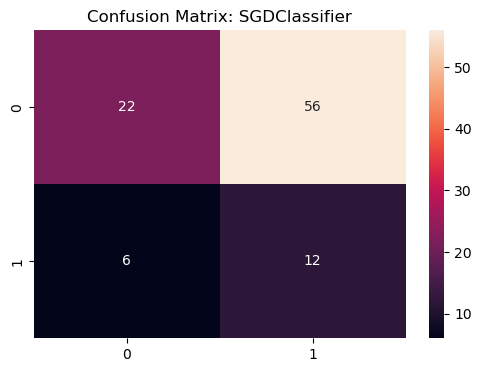

              precision    recall  f1-score   support

           0       0.79      0.28      0.42        78
           1       0.18      0.67      0.28        18

    accuracy                           0.35        96
   macro avg       0.48      0.47      0.35        96
weighted avg       0.67      0.35      0.39        96

accuracy is:  0.3541666666666667 recall is:  0.6666666666666666 f1_score is: 0.27906976744186046


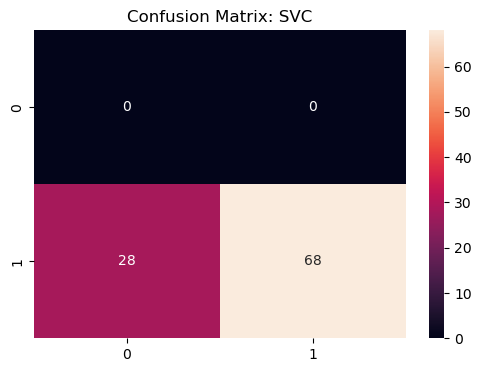

C:\Users\Elkady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elkady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elkady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.71      0.83        96

    accuracy                           0.71        96
   macro avg       0.50      0.35      0.41        96
weighted avg       1.00      0.71      0.83        96

accuracy is:  0.7083333333333334 recall is:  0.7083333333333334 f1_score is: 0.8292682926829268


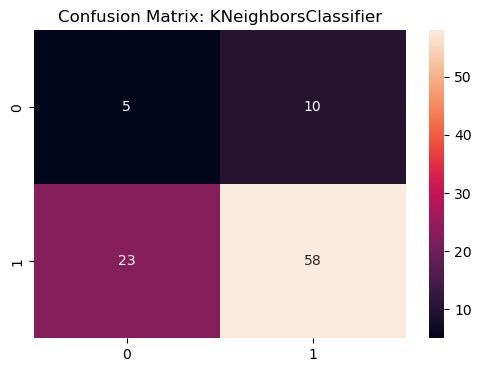

              precision    recall  f1-score   support

           0       0.18      0.33      0.23        15
           1       0.85      0.72      0.78        81

    accuracy                           0.66        96
   macro avg       0.52      0.52      0.51        96
weighted avg       0.75      0.66      0.69        96

accuracy is:  0.65625 recall is:  0.7160493827160493 f1_score is: 0.7785234899328859


In [32]:
evalute_model(models,x_train,y_train,x_test,y_test)

In [33]:
final_result = pd.DataFrame({'Algorithm':Alogoriths,'Accuracy':accuracies,'Recall':recalls,'F1_score':f1_scores})

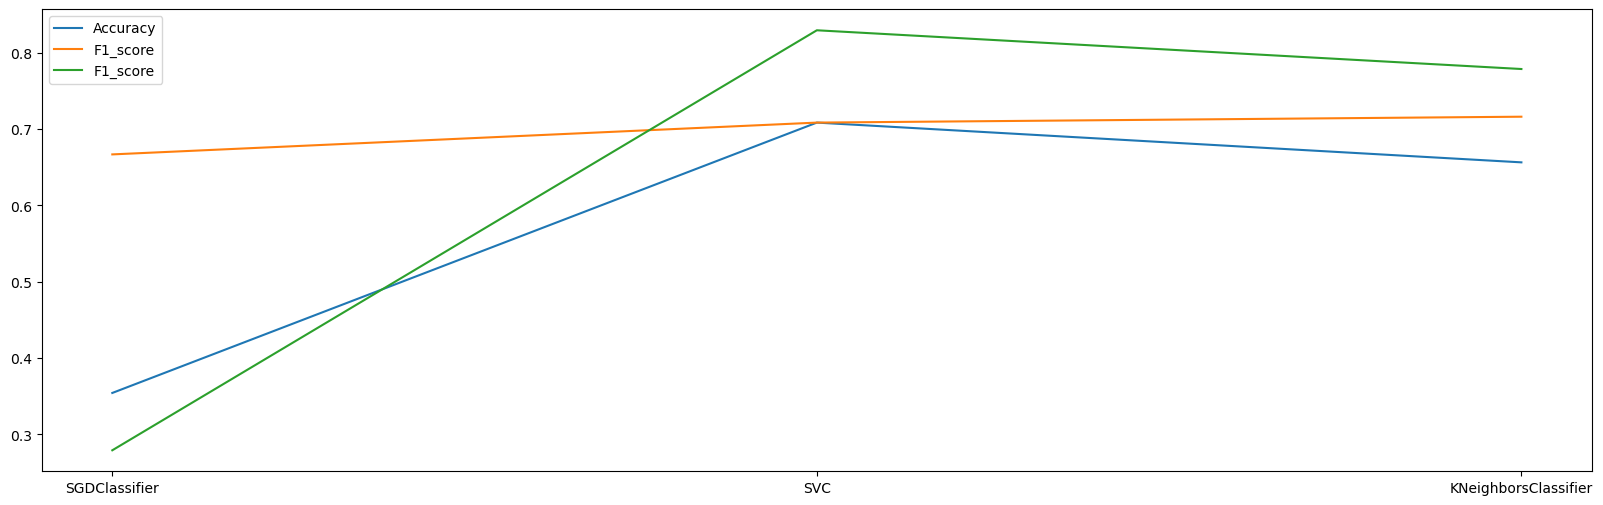

In [44]:
fig,ax = plt.subplots(figsize=(20,6))
plt.plot(final_result.Algorithm,accuracies,label= 'Accuracy')
plt.plot(final_result.Algorithm,recalls,label = 'F1_score')
plt.plot(final_result.Algorithm,f1_scores,label = 'F1_score')
plt.legend()
plt.show()